In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':[12,8]})

import scipy.stats

# Loading data
df = pd.read_pickle('STING_DB.pkl')
df.head()

,n_patient,id,label,array,n_cores,sp,sp_date,turb,histo,lesion,...,bcg,bcg_date,mitomycin,progression_stage_any,progression_stage_next,recurrence_any,recurrence_next,progression_grade_any,progression_grade_next,fu_months
0,1,19870070301,OO,935,1.0,05-S-9869,2005-12-07,4,4,Non-tumor,...,No,NaT,0,No,Yes,Yes,Yes,No,Yes,270.933333
1,1,19870070301,OO,931,3.0,07-S-11432,2007-11-14,5,1,Low-grade,...,No,NaT,0,No,No,Yes,No,No,No,270.933333
2,1,19870070301,OO,931,3.0,07-S-11432,2007-11-14,5,1,Low-grade,...,No,NaT,0,No,No,Yes,No,No,No,270.933333
3,1,19870070301,OO,931,3.0,07-S-11432,2007-11-14,5,1,Low-grade,...,No,NaT,0,No,No,Yes,No,No,No,270.933333
4,1,19870070301,OO,931,3.0,05-S-4662,2005-06-10,3,2,High-grade,...,No,NaT,0,No,No,Yes,No,No,No,270.933333


# Correlation between markers

## STING vs cGAS vs pIRF3

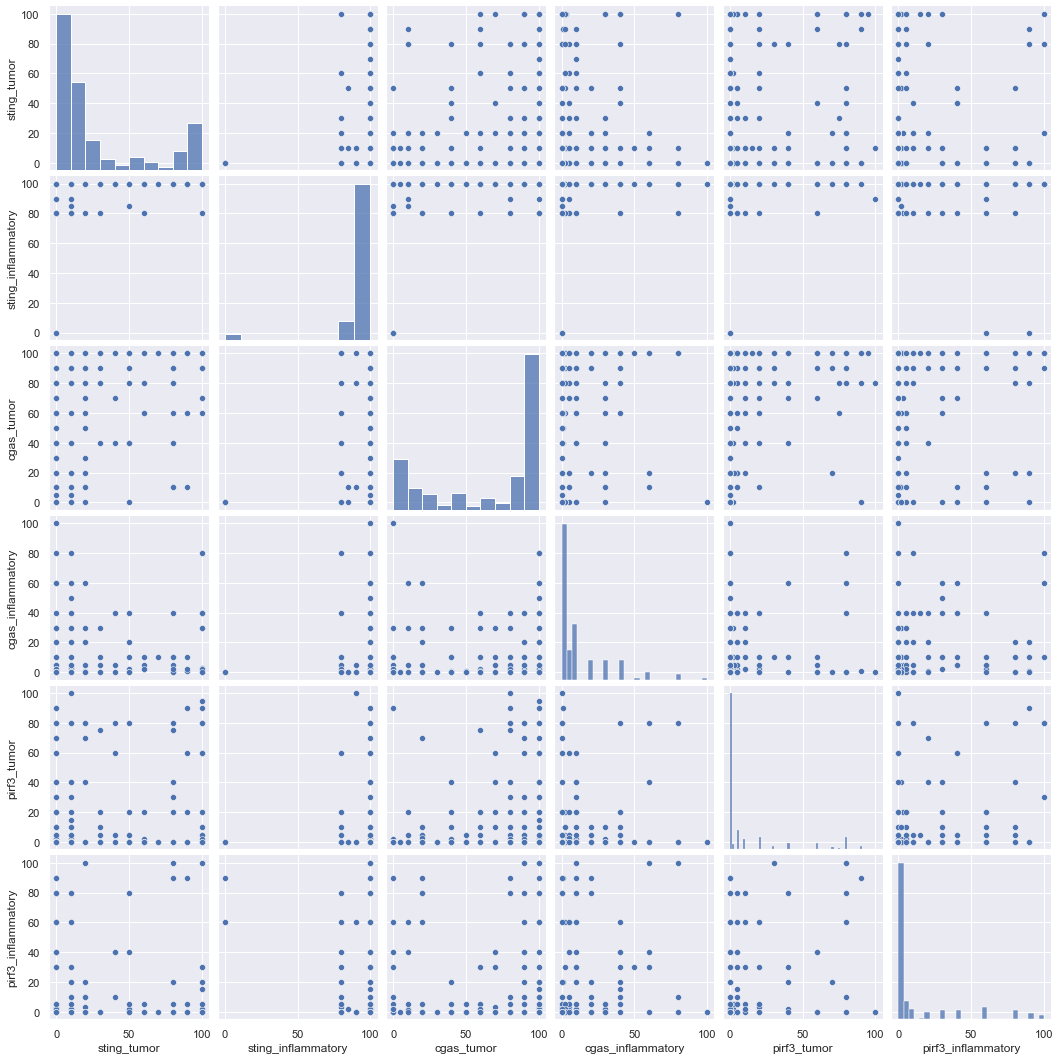

In [2]:
markers = ['sting_tumor', 'sting_inflammatory', 'cgas_tumor', 'cgas_inflammatory', 'pirf3_tumor', 'pirf3_inflammatory']
df_cor = df.loc[:,markers]
g = sns.pairplot(df_cor)

### Correlation coefficients

In [3]:
rho, p = scipy.stats.spearmanr(np.array(df_cor), nan_policy='omit')
pd.DataFrame(rho, index=markers, columns=markers).round(2)

,sting_tumor,sting_inflammatory,cgas_tumor,cgas_inflammatory,pirf3_tumor,pirf3_inflammatory
sting_tumor,1.00,0.11,0.43,0.05,0.04,-0.03
sting_inflammatory,0.11,1.00,0.16,0.21,0.05,-0.14
cgas_tumor,0.43,0.16,1.00,0.19,0.28,0.00
cgas_inflammatory,0.05,0.21,0.19,1.00,0.12,0.29
pirf3_tumor,0.04,0.05,0.28,0.12,1.00,0.43
pirf3_inflammatory,-0.03,-0.14,0.00,0.29,0.43,1.00


### P values

In [4]:
pd.DataFrame(p, index=markers, columns=markers).round(5)

,sting_tumor,sting_inflammatory,cgas_tumor,cgas_inflammatory,pirf3_tumor,pirf3_inflammatory
sting_tumor,0.00000,0.18353,0.00000,0.50039,0.52240,0.70678
sting_inflammatory,0.18353,0.00000,0.04447,0.00691,0.50231,0.07203
cgas_tumor,0.00000,0.04447,0.00000,0.01740,0.00000,0.99256
cgas_inflammatory,0.50039,0.00691,0.01740,0.00000,0.13053,0.00018
pirf3_tumor,0.52240,0.50231,0.00000,0.13053,0.00000,0.00000
pirf3_inflammatory,0.70678,0.07203,0.99256,0.00018,0.00000,0.00000


## STING vs PD-L1 vs FOXP3

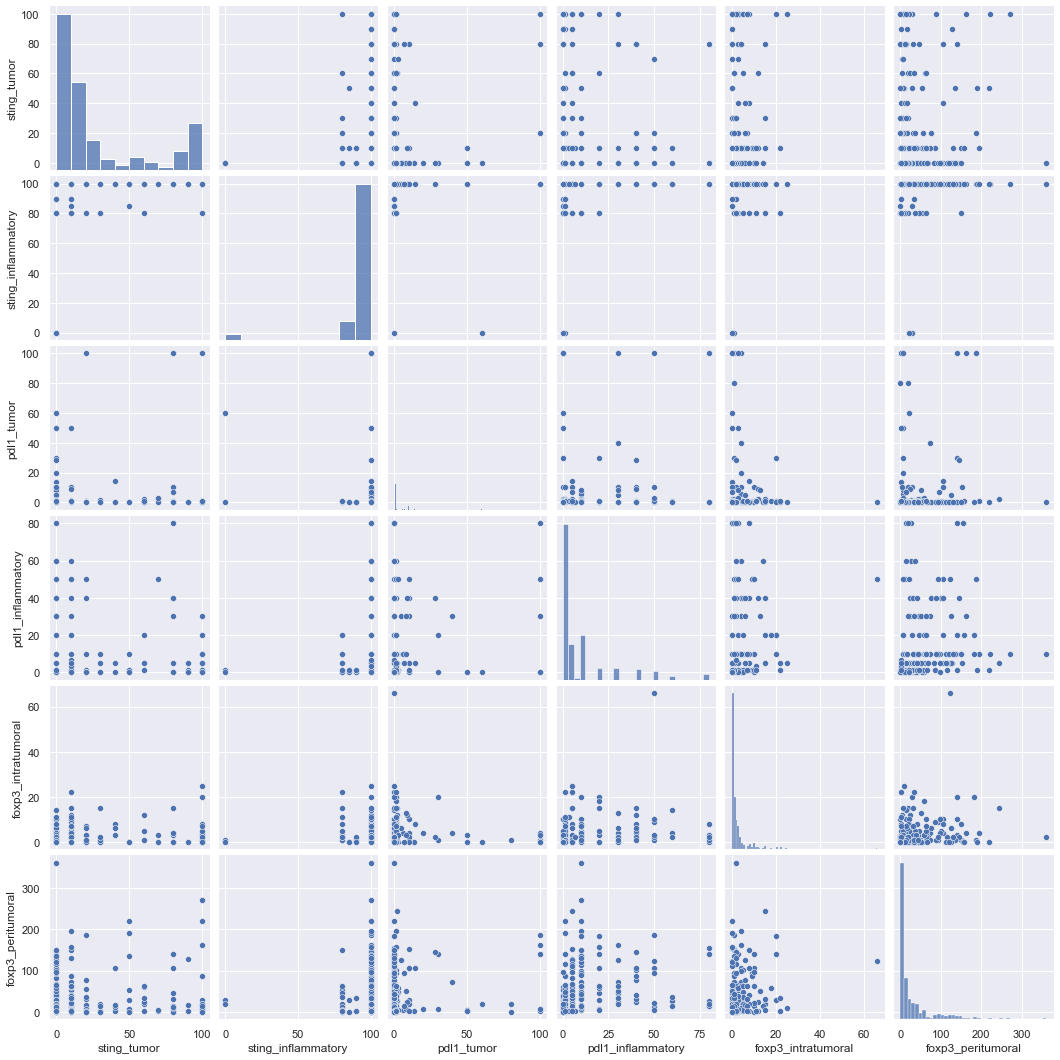

In [5]:
markers = ['sting_tumor','sting_inflammatory','pdl1_tumor','pdl1_inflammatory','foxp3_intratumoral','foxp3_peritumoral']
df_cor = df.loc[:,markers]
g = sns.pairplot(df_cor)

### Correlation coefficients

In [6]:
rho, p = scipy.stats.spearmanr(np.array(df_cor), nan_policy='omit')
pd.DataFrame(rho, index=markers, columns=markers).round(2)

,sting_tumor,sting_inflammatory,pdl1_tumor,pdl1_inflammatory,foxp3_intratumoral,foxp3_peritumoral
sting_tumor,1.00,0.11,-0.07,-0.10,-0.02,-0.05
sting_inflammatory,0.11,1.00,0.07,0.08,0.00,0.14
pdl1_tumor,-0.07,0.07,1.00,0.30,0.36,0.22
pdl1_inflammatory,-0.10,0.08,0.30,1.00,0.46,0.60
foxp3_intratumoral,-0.02,0.00,0.36,0.46,1.00,0.41
foxp3_peritumoral,-0.05,0.14,0.22,0.60,0.41,1.00


### P values

In [7]:
pd.DataFrame(p, index=markers, columns=markers).round(5)

,sting_tumor,sting_inflammatory,pdl1_tumor,pdl1_inflammatory,foxp3_intratumoral,foxp3_peritumoral
sting_tumor,0.00000,0.18353,0.27253,0.19572,0.78500,0.41814
sting_inflammatory,0.18353,0.00000,0.36777,0.31165,0.97901,0.08449
pdl1_tumor,0.27253,0.36777,0.00000,0.00001,0.00000,0.00004
pdl1_inflammatory,0.19572,0.31165,0.00001,0.00000,0.00000,0.00000
foxp3_intratumoral,0.78500,0.97901,0.00000,0.00000,0.00000,0.00000
foxp3_peritumoral,0.41814,0.08449,0.00004,0.00000,0.00000,0.00000


## STING vs CD8 cs CD8-Ki67

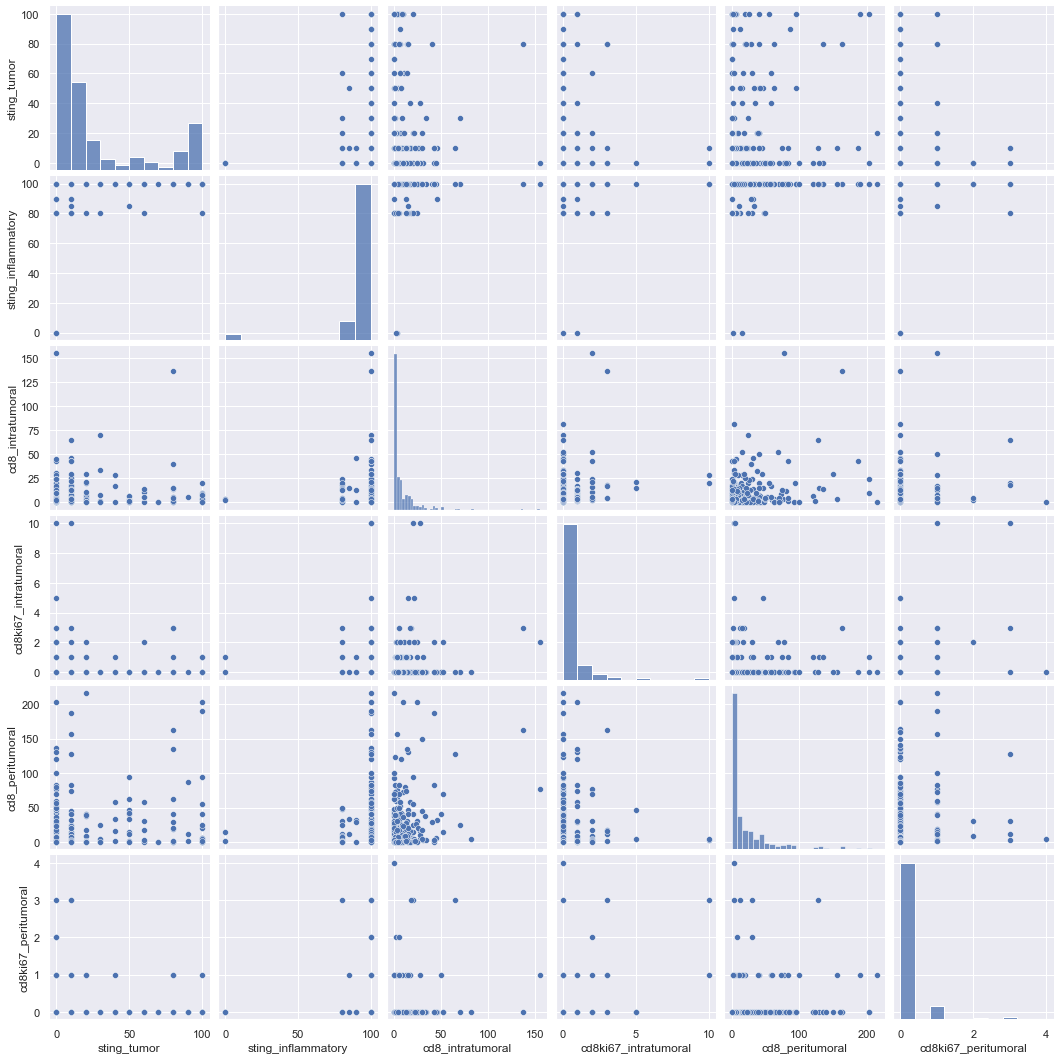

In [8]:
markers = ['sting_tumor','sting_inflammatory','cd8_intratumoral','cd8ki67_intratumoral', 'cd8_peritumoral', 'cd8ki67_peritumoral']
df_cor = df.loc[:,markers]
g = sns.pairplot(df_cor)

### Correlation coefficients

In [9]:
rho, p = scipy.stats.spearmanr(np.array(df_cor), nan_policy='omit')
pd.DataFrame(rho, index=markers, columns=markers).round(2)

,sting_tumor,sting_inflammatory,cd8_intratumoral,cd8ki67_intratumoral,cd8_peritumoral,cd8ki67_peritumoral
sting_tumor,1.00,0.11,0.06,-0.03,0.03,-0.07
sting_inflammatory,0.11,1.00,0.04,-0.04,0.14,0.08
cd8_intratumoral,0.06,0.04,1.00,0.37,0.33,0.09
cd8ki67_intratumoral,-0.03,-0.04,0.37,1.00,0.16,0.22
cd8_peritumoral,0.03,0.14,0.33,0.16,1.00,0.19
cd8ki67_peritumoral,-0.07,0.08,0.09,0.22,0.19,1.00


### P values

In [10]:
pd.DataFrame(p, index=markers, columns=markers).round(5)

,sting_tumor,sting_inflammatory,cd8_intratumoral,cd8ki67_intratumoral,cd8_peritumoral,cd8ki67_peritumoral
sting_tumor,0.00000,0.18353,0.39800,0.64942,0.59106,0.25142
sting_inflammatory,0.18353,0.00000,0.67540,0.66300,0.08392,0.36822
cd8_intratumoral,0.39800,0.67540,0.00000,0.00000,0.00000,0.10721
cd8ki67_intratumoral,0.64942,0.66300,0.00000,0.00000,0.00508,0.00011
cd8_peritumoral,0.59106,0.08392,0.00000,0.00508,0.00000,0.00028
cd8ki67_peritumoral,0.25142,0.36822,0.10721,0.00011,0.00028,0.00000


## cGAS vs PD-L1 vs FOXP3

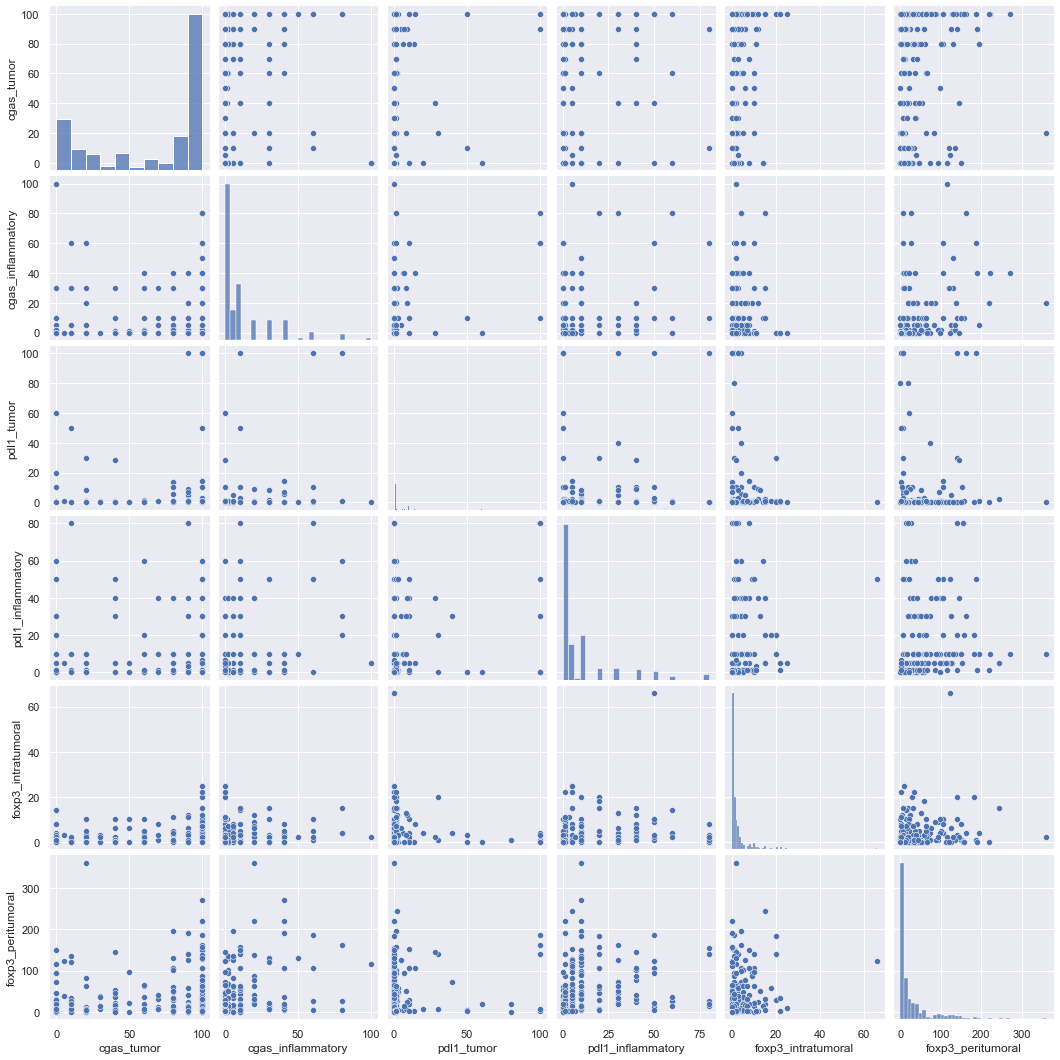

In [11]:
markers = ['cgas_tumor','cgas_inflammatory','pdl1_tumor','pdl1_inflammatory','foxp3_intratumoral','foxp3_peritumoral']
df_cor = df.loc[:,markers]
g = sns.pairplot(df_cor)

### Correlation coefficients

In [12]:
rho, p = scipy.stats.spearmanr(np.array(df_cor), nan_policy='omit')
pd.DataFrame(rho, index=markers, columns=markers).round(2)

,cgas_tumor,cgas_inflammatory,pdl1_tumor,pdl1_inflammatory,foxp3_intratumoral,foxp3_peritumoral
cgas_tumor,1.00,0.19,0.07,0.06,0.12,0.04
cgas_inflammatory,0.19,1.00,0.23,0.27,0.16,0.34
pdl1_tumor,0.07,0.23,1.00,0.30,0.36,0.22
pdl1_inflammatory,0.06,0.27,0.30,1.00,0.46,0.60
foxp3_intratumoral,0.12,0.16,0.36,0.46,1.00,0.41
foxp3_peritumoral,0.04,0.34,0.22,0.60,0.41,1.00


### P values

In [13]:
pd.DataFrame(p, index=markers, columns=markers).round(5)

,cgas_tumor,cgas_inflammatory,pdl1_tumor,pdl1_inflammatory,foxp3_intratumoral,foxp3_peritumoral
cgas_tumor,0.00000,0.01740,0.24578,0.43306,0.05380,0.53934
cgas_inflammatory,0.01740,0.00000,0.00466,0.00074,0.06155,0.00002
pdl1_tumor,0.24578,0.00466,0.00000,0.00001,0.00000,0.00004
pdl1_inflammatory,0.43306,0.00074,0.00001,0.00000,0.00000,0.00000
foxp3_intratumoral,0.05380,0.06155,0.00000,0.00000,0.00000,0.00000
foxp3_peritumoral,0.53934,0.00002,0.00004,0.00000,0.00000,0.00000


## cGAS vs CD8 vs CD8-Ki67

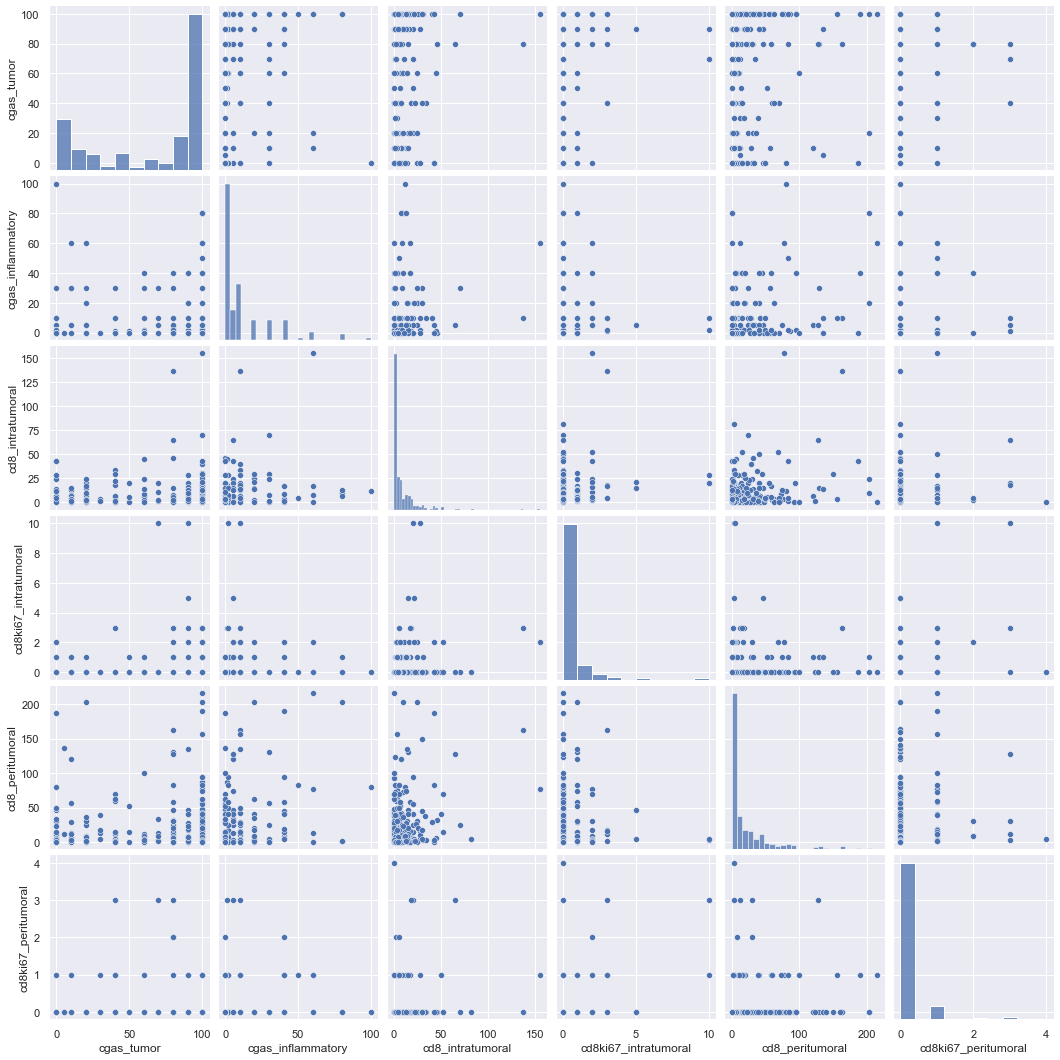

In [14]:
markers = ['cgas_tumor','cgas_inflammatory','cd8_intratumoral','cd8ki67_intratumoral', 'cd8_peritumoral', 'cd8ki67_peritumoral']
df_cor = df.loc[:,markers]
g = sns.pairplot(df_cor)

### Correlation coefficients

In [15]:
rho, p = scipy.stats.spearmanr(np.array(df_cor), nan_policy='omit')
pd.DataFrame(rho, index=markers, columns=markers).round(2)

,cgas_tumor,cgas_inflammatory,cd8_intratumoral,cd8ki67_intratumoral,cd8_peritumoral,cd8ki67_peritumoral
cgas_tumor,1.00,0.19,0.01,0.14,0.07,0.06
cgas_inflammatory,0.19,1.00,0.22,0.09,0.14,0.11
cd8_intratumoral,0.01,0.22,1.00,0.37,0.33,0.09
cd8ki67_intratumoral,0.14,0.09,0.37,1.00,0.16,0.22
cd8_peritumoral,0.07,0.14,0.33,0.16,1.00,0.19
cd8ki67_peritumoral,0.06,0.11,0.09,0.22,0.19,1.00


### P values

In [16]:
pd.DataFrame(p, index=markers, columns=markers).round(5)

,cgas_tumor,cgas_inflammatory,cd8_intratumoral,cd8ki67_intratumoral,cd8_peritumoral,cd8ki67_peritumoral
cgas_tumor,0.00000,0.01740,0.93137,0.03802,0.24720,0.34870
cgas_inflammatory,0.01740,0.00000,0.01021,0.28097,0.09868,0.18029
cd8_intratumoral,0.93137,0.01021,0.00000,0.00000,0.00000,0.10721
cd8ki67_intratumoral,0.03802,0.28097,0.00000,0.00000,0.00508,0.00011
cd8_peritumoral,0.24720,0.09868,0.00000,0.00508,0.00000,0.00028
cd8ki67_peritumoral,0.34870,0.18029,0.10721,0.00011,0.00028,0.00000


## pIRF3 vs PD-L1 vs FOXP3

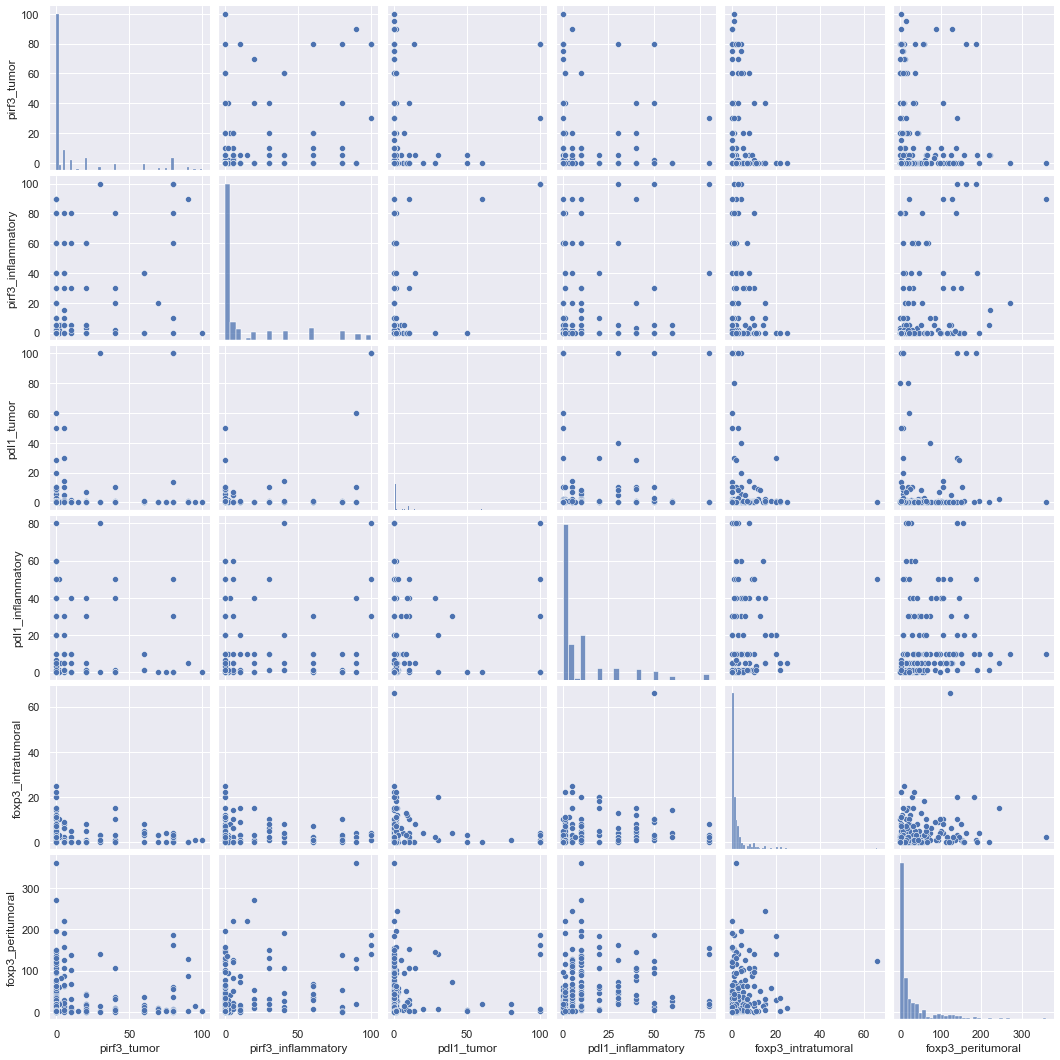

In [17]:
markers = ['pirf3_tumor','pirf3_inflammatory','pdl1_tumor','pdl1_inflammatory','foxp3_intratumoral','foxp3_peritumoral']
df_cor = df.loc[:,markers]
g = sns.pairplot(df_cor)

### Correlation coefficients

In [18]:
rho, p = scipy.stats.spearmanr(np.array(df_cor), nan_policy='omit')
pd.DataFrame(rho, index=markers, columns=markers).round(2)

,pirf3_tumor,pirf3_inflammatory,pdl1_tumor,pdl1_inflammatory,foxp3_intratumoral,foxp3_peritumoral
pirf3_tumor,1.00,0.43,0.05,-0.05,-0.01,0.06
pirf3_inflammatory,0.43,1.00,0.02,0.15,0.04,0.31
pdl1_tumor,0.05,0.02,1.00,0.30,0.36,0.22
pdl1_inflammatory,-0.05,0.15,0.30,1.00,0.46,0.60
foxp3_intratumoral,-0.01,0.04,0.36,0.46,1.00,0.41
foxp3_peritumoral,0.06,0.31,0.22,0.60,0.41,1.00


### P values

In [19]:
pd.DataFrame(p, index=markers, columns=markers).round(5)

,pirf3_tumor,pirf3_inflammatory,pdl1_tumor,pdl1_inflammatory,foxp3_intratumoral,foxp3_peritumoral
pirf3_tumor,0.00000,0.00000,0.43376,0.55656,0.89920,0.35585
pirf3_inflammatory,0.00000,0.00000,0.77358,0.05936,0.66047,0.00013
pdl1_tumor,0.43376,0.77358,0.00000,0.00001,0.00000,0.00004
pdl1_inflammatory,0.55656,0.05936,0.00001,0.00000,0.00000,0.00000
foxp3_intratumoral,0.89920,0.66047,0.00000,0.00000,0.00000,0.00000
foxp3_peritumoral,0.35585,0.00013,0.00004,0.00000,0.00000,0.00000


## pIRF3 vs CD8 vs CD8-Ki67 

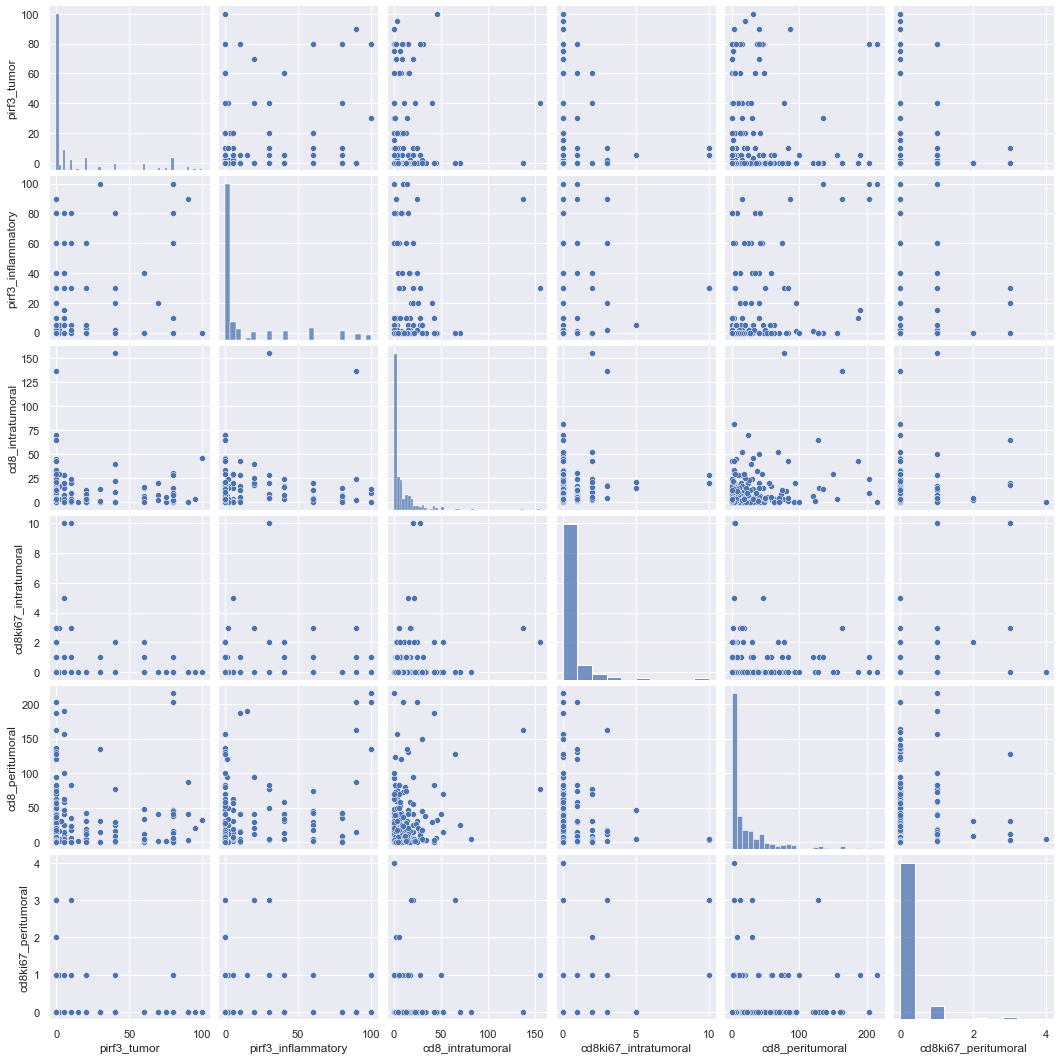

In [20]:
markers = ['pirf3_tumor','pirf3_inflammatory','cd8_intratumoral','cd8ki67_intratumoral', 'cd8_peritumoral', 'cd8ki67_peritumoral']
df_cor = df.loc[:,markers]
g = sns.pairplot(df_cor)

### Correlation coefficients

In [21]:
rho, p = scipy.stats.spearmanr(np.array(df_cor), nan_policy='omit')
pd.DataFrame(rho, index=markers, columns=markers).round(2)

,pirf3_tumor,pirf3_inflammatory,cd8_intratumoral,cd8ki67_intratumoral,cd8_peritumoral,cd8ki67_peritumoral
pirf3_tumor,1.00,0.43,0.02,-0.04,0.12,0.09
pirf3_inflammatory,0.43,1.00,0.21,0.19,0.33,0.11
cd8_intratumoral,0.02,0.21,1.00,0.37,0.33,0.09
cd8ki67_intratumoral,-0.04,0.19,0.37,1.00,0.16,0.22
cd8_peritumoral,0.12,0.33,0.33,0.16,1.00,0.19
cd8ki67_peritumoral,0.09,0.11,0.09,0.22,0.19,1.00


### P values

In [22]:
pd.DataFrame(p, index=markers, columns=markers).round(5)

,pirf3_tumor,pirf3_inflammatory,cd8_intratumoral,cd8ki67_intratumoral,cd8_peritumoral,cd8ki67_peritumoral
pirf3_tumor,0.00000,0.00000,0.76448,0.49706,0.06737,0.17804
pirf3_inflammatory,0.00000,0.00000,0.01563,0.02955,0.00006,0.18030
cd8_intratumoral,0.76448,0.01563,0.00000,0.00000,0.00000,0.10721
cd8ki67_intratumoral,0.49706,0.02955,0.00000,0.00000,0.00508,0.00011
cd8_peritumoral,0.06737,0.00006,0.00000,0.00508,0.00000,0.00028
cd8ki67_peritumoral,0.17804,0.18030,0.10721,0.00011,0.00028,0.00000
